<a href="https://colab.research.google.com/github/Mohamed-Diagne/Ethereum-Token-Transfer-Network-Analysis/blob/main/Ethereum_Network_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📑 **Token Transfer Network Analysis on Ethereum Blockchain**

## Project Context
The objective of this project is to apply network science techniques to a real-world Ethereum dataset, focusing on token transfer activities.
By constructing and analyzing a multi-token transfer network, we aim to uncover the economic patterns, key players, and structural properties underlying the blockchain activity.

This project follows a strict methodology:
- **Data preparation**: Clean and filter token transfer records to retain only meaningful economic interactions.
- **Network construction**: Build a directed weighted network where nodes are addresses and edges are token transfers.
- **Exploratory network analysis**: Compute key network metrics and provide visual insights.
- **Account behavior analysis**: Investigate specific addresses and communities.
- **Machine learning application**: Predict account categories or future interactions using network features.

## Datasets
- `transfers_20080000.parquet`: Token transfer events across 1,000 blocks.
- `txs_20080000.parquet`: Full transaction details.
- `token_labels.csv`: Verified token contracts.
- `account_labels.csv`: Known accounts and their labels.

## General Objective
To build an **interpretable, clean, and reproducible notebook** capable of illustrating strong analytical thinking, rigorous data handling, and clear network science application in the context of blockchain technologies.

---


# 🔍 1.1 Dataset

### Objective:
Before cleaning or modeling anything, we need to deeply understand the structure, variables, and contents of the raw datasets. This includes:

- Previewing the first rows of each dataset
- Understanding the schema and variable types
- Checking for missing values or anomalies
- Identifying how addresses, tokens, and values are stored
- Exploring basic descriptive statistics (distributions, counts)
- Evaluating time range covered

This exploratory analysis is essential to justify preprocessing decisions later.

### Datasets:
We are using the following sources:
- `transfers_20080000.parquet` – All token transfers (ERC20/ERC721/ERC1155) across 1,000 blocks
- `txs_20080000.parquet` – All transactions across these blocks
- `token_labels.csv` – Verified token contracts with metadata
- `account_labels.csv` – Annotated Ethereum addresses (labels, roles, tags)

Let's begin by loading and inspecting each.


In [ ]:
# Imports
import pandas as pd
import numpy as np

#drive
from google.colab import drive
drive.mount('/content/drive')

# Paths
transfers_path = '/content/drive/MyDrive/transfers_20080000.parquet'
txs_path = '/content/drive/MyDrive/txs_20080000.parquet'
token_labels_path = '/content/drive/MyDrive/token_labels.csv'
account_labels_path = '/content/drive/MyDrive/account_labels.csv'

# Load datasets
df_transfers = pd.read_parquet(transfers_path)
df_txs = pd.read_parquet(txs_path)
df_token_labels = pd.read_csv(token_labels_path)
df_account_labels = pd.read_csv(account_labels_path)

print("Datasets loaded successfully.")


Mounted at /content/drive
Datasets loaded successfully.


In [ ]:
# First rows
display(df_transfers.head())
display(df_txs.head())
display(df_token_labels.head())
display(df_account_labels.head())

blockNum                                           uniqueId  \
0  0x1326580  0x52b2082a989d16cda6d3d8b4beac9adf725906a69dfe...   
1  0x1326580  0xf0a97eb5d4e66c964537aa23a14de9e0d9df3d9feac3...   
2  0x1326580  0xf0a97eb5d4e66c964537aa23a14de9e0d9df3d9feac3...   
3  0x1326580  0xf0a97eb5d4e66c964537aa23a14de9e0d9df3d9feac3...   
4  0x1326580  0xf0a97eb5d4e66c964537aa23a14de9e0d9df3d9feac3...   

                                                hash  \
0  0x52b2082a989d16cda6d3d8b4beac9adf725906a69dfe...   
1  0xf0a97eb5d4e66c964537aa23a14de9e0d9df3d9feac3...   
2  0xf0a97eb5d4e66c964537aa23a14de9e0d9df3d9feac3...   
3  0xf0a97eb5d4e66c964537aa23a14de9e0d9df3d9feac3...   
4  0xf0a97eb5d4e66c964537aa23a14de9e0d9df3d9feac3...   

                                         from  \
0  0xcc6c1d21e8474b3578e69eb036c712ab08ffdfbb   
1  0x7d1c3f9f61e3cd667d22b4613a49ac27f53bf8be   
2  0xb4b50bfa4c4c90dd25a4cbe695f8124d24ac6474   
3  0x390f3595bca2df7d23783dfd126427cceb997bf4   
4  0xb4b50bfa4c4c90dd25a4cbe695f8124d24ac6474   

                                           to         value erc721TokenId  \
0  0x18e804e61c44fd194753ce89b32a87acd8435a8d           NaN          None   
1  0xb4b50bfa4c4c90dd25a4cbe695f8124d24ac6474  71857.370402          None   
2  0x390f3595bca2df7d23783dfd126427cceb997bf4  70317.893373          None   
3  0xb4b50bfa4c4c90dd25a4cbe695f8124d24ac6474  70375.975818          None   
4  0x4ebdf703948ddcea3b11f675b4d1fba9d2414a14  70375.975818          None   

                          erc1155Metadata tokenId   asset category  \
0  [{'tokenId': '0x08', 'value': '0x01'}]    None    None  erc1155   
1                                    None    None    USDT    erc20   
2                                    None    None    USDT    erc20   
3                                    None    None  CRVUSD    erc20   
4                                    None    None  CRVUSD    erc20   

        rawContract.value                         rawContract.address  \
0                    None  0x232a68a51d6e07357ae025d2a459c16077327102   
1            0x10bb087522  0xdac17f958d2ee523a2206206994597c13d831ec7   
2            0x105f45e6fd  0xdac17f958d2ee523a2206206994597c13d831ec7   
3  0x0ee716dbf22068b88d81  0xf939e0a03fb07f59a73314e73794be0e57ac1b4e   
4  0x0ee716dbf22068b88d81  0xf939e0a03fb07f59a73314e73794be0e57ac1b4e   

  rawContract.decimal   metadata.blockTimestamp  
0                None  2024-06-13T02:43:59.000Z  
1                 0x6  2024-06-13T02:43:59.000Z  
2                 0x6  2024-06-13T02:43:59.000Z  
3                0x12  2024-06-13T02:43:59.000Z  
4                0x12  2024-06-13T02:43:59.000Z

Transaction_Hash           Method  \
0  0x7a5c204a8d5326deeef0721567b8149e44c0bd3730b7...         Transfer   
1  0xd38227ba6e04c72aae755d3e606783fe0f77d8bfed65...            Claim   
2  0xf097639d203d18aa688bd69dd06ad98d39e55f17c3d7...             Swap   
3  0x6c824de781cdd2f1b86622dfa1650282d84265ad70d0...  I Love Gambling   
4  0x251a6d9d61ecb67e5f20118337bba40fbd6161b0c547...         Transfer   

      Block           Date_Time           Age  Description  \
0  20080000  2024-06-13 2:43:59  198 days ago   1718246639   
1  20080000  2024-06-13 2:43:59  198 days ago   1718246639   
2  20080000  2024-06-13 2:43:59  198 days ago   1718246639   
3  20080000  2024-06-13 2:43:59  198 days ago   1718246639   
4  20080000  2024-06-13 2:43:59  198 days ago   1718246639   

                     From   Dir                          To  \
0             beaverbuild  None  Fee Recipient: 0xF1...358F   
1  0xc48919DB...F1836e52E  None      0x7ca50Eb6...fa34707ca   
2  0x4E97111d...89Fe64C83  None       Aggregation Router V6   
3  0xe6025F59...973092046  None      0x5782B702...aF5d2A486   
4  0x935D2e47...94eFaE6A9  None      0xB982934c...bcD74DFEA   

                        Value   Txn_Fee    Gas_Price      Method_full  \
0  0.599617272 ETH\n$2,003.73  0.000608  22.23894624         Transfer   
1                0 ETH\n$0.00  0.002402  22.24777492            Claim   
2                0 ETH\n$0.00  0.008774  22.24894624             Swap   
3                0 ETH\n$0.00  0.002321  22.24894624  I Love Gambling   
4       0.00116756 ETH\n$3.90  0.000467  22.24894624         Transfer   

                                           From_full  \
0  beaverbuild\n(0x95222290dd7278aa3ddd389cc1e1d1...   
1         0xc48919db16ad29af3ce5dceae83be3cf1836e52e   
2         0x4e97111d6b0c4c3867ce703f7ecf39489fe64c83   
3         0xe6025f59e411548b4f35cee8420de46973092046   
4         0x935d2e470284fb536227a76a723f96a94efae6a9   

                                             To_full From_sign   To_sign  \
0  Fee Recipient: 0xF1...358F\n(0xf17d119effa0dcb...      None  Contract   
1         0x7ca50eb6f717843a134aacca58ebf09fa34707ca      None  Contract   
2  Aggregation Router V6\n(0x111111125421ca6dc452...      None  Contract   
3         0x5782b702257fa61ed332510252d746baf5d2a486      None  Contract   
4         0xb982934c903d36e5b08b8280e181a90bcd74dfea      None      None   

  Txn_sign  
0     None  
1     None  
2     None  
3     None  
4     None

address    #             Token   Symbol  \
0  0xdac17f958d2ee523a2206206994597c13d831ec7  1.0        Tether USD     USDT   
1  0xb8c77482e45f1f44de1745f52c74426c631bdd52  2.0               BNB      BNB   
2  0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48  3.0              USDC     USDC   
3  0xae7ab96520de3a18e5e111b5eaab095312d7fe84  4.0             stETH    stETH   
4  0x582d872a1b094fc48f5de31d3b73f2d9be47def1  5.0  Wrapped TON Coin  TONCOIN   

       Price  Price (ETH)      name_x symbol             name_y  \
0     0.9979     0.000299  Tether USD   USDT  Tether USD (USDT)   
1   704.1118     0.211034         BNB    BNB          BNB (BNB)   
2     1.0000     0.000300        USDC   USDC    USD Coin (USDC)   
3  3330.9200     0.998332       stETH  stETH      stETH (stETH)   
4     5.4700     0.001639         NaN    NaN                NaN   

                                              labels  
0                 ['bitfinex' 'stablecoin' 'tether']  
1                     ['mainnet-launched' 'binance']  
2                   ['circle' 'stablecoin' 'centre']  
3  ['beacon-depositor' 'lido' 'liquid-staking' 's...  
4                                                NaN

address               name group sign  \
0  0x0000000000000000000000000000000000000000  Null: 0x000...000  Null  NaN   
1  0x0000000000000000000000000000000000000001  Null: 0x000...001  Null  NaN   
2  0x0000000000000000000000000000000000000002  Null: 0x000...002  Null  NaN   
3  0x0000000000000000000000000000000000000003  Null: 0x000...003  Null  NaN   
4  0x0000000000000000000000000000000000000004  Null: 0x000...004  Null  NaN   

  etherscan dawsbot brianleect                     other_name  \
0      True    True       True  ['Null Address: 0x000...000']   
1      True    True       True  ['Null Address: 0x000...001']   
2       NaN    True       True                            NaN   
3       NaN    True       True                            NaN   
4       NaN    True       True                            NaN   

                         labels  
0  ['blocked' 'burn' 'genesis']  
1            ['blocked' 'burn']  
2            ['burn' 'genesis']  
3            ['burn' 'genesis']  
4            ['burn' 'genesis']

# 🧹 1.2 Data Cleaning and Filtering (Final Version)

## **Objective**

To construct a meaningful and clean token transfer network, we need to apply rigorous filtering and cleaning steps.
The goal is to retain only economically relevant and verified ERC20 token transfers.


In [ ]:
df_clean = df_transfers.copy()
print(f"Initial number of transfers: {len(df_clean):,}")

Initial number of transfers: 3,717,614


### **1️- Filter Category → ERC20 Only**
- We exclude NFTs (ERC721) and semi-fungible tokens (ERC1155) that are not economically comparable.

In [ ]:
df_clean = df_clean[df_clean['category'] == 'erc20'].copy()
print(f"After ERC20 filtering: {len(df_clean):,}")

After ERC20 filtering: 1,735,425


### **2️- Remove Missing Asset Entries**
- Transfers without token information (asset is missing) are excluded.

In [ ]:
df_clean = df_clean.dropna(subset=['asset'])
print(f"After removing missing asset: {len(df_clean):,}")

After removing missing asset: 1,716,837


### **3️- Normalize All Addresses (case-insensitive)**
- All addresses are converted to lowercase to avoid duplicates and inconsistencies.

In [ ]:
for col in ['from', 'to', 'rawContract.address']:
    df_clean[col] = df_clean[col].str.lower()

print("Addresses normalized.")

Addresses normalized.


### **4️- Keep Only Verified Tokens**
- Only tokens from the verified list (`token_labels.csv`) are retained.

In [ ]:
df_token_labels['address'] = df_token_labels['address'].str.lower()
verified_contracts = set(df_token_labels['address'])

df_clean = df_clean[df_clean['rawContract.address'].isin(verified_contracts)].copy()
print(f"After verified token filtering: {len(df_clean):,}")

After verified token filtering: 1,366,388


### **5️- Filter Valid Decimals**

#### Rationale

Token decimals define how values are represented on-chain.  
- **Stablecoins** (USDC, USDT) use `6` decimals for simple accounting.  
- **DeFi tokens** (WETH, DAI, CRV) use `18` decimals to enable high-precision calculations.  
- **Spam or non-standard tokens** often use decimals below `6`.

#### Filtering Decision

To avoid noise, we exclude tokens with decimals **below 6**, while retaining all tokens with decimals **6 and above**, as they represent economically relevant assets.

> "Token decimals define the precision and are critical to properly interpreting token balances."  
> *— ERC20 Token Standard Documentation*


In [ ]:
# Convert decimals from hex to integer
df_clean['rawContract.decimal_int'] = df_clean['rawContract.decimal'].apply(lambda x: int(x, 16) if pd.notnull(x) else None)

# Show distribution
decimal_distribution = df_clean['rawContract.decimal_int'].value_counts().sort_index()
print("Decimal distribution:")
display(decimal_distribution)

# Merge with token labels to see top tokens by decimal
df_token_decimals = df_clean.groupby('asset')['rawContract.decimal_int'].agg(['count', 'first']).reset_index()
df_token_decimals = df_token_decimals.sort_values('count', ascending=False)

print("\nTop tokens and their decimals:")
display(df_token_decimals.head(20))


Decimal distribution:


rawContract.decimal_int
0.0        359
2.0        831
3.0          9
4.0        515
5.0        224
6.0     343285
7.0        138
8.0      18531
9.0      66538
10.0        77
11.0         7
12.0        26
14.0        13
15.0        94
16.0       299
18.0    934859
24.0       132
Name: count, dtype: int64


Top tokens and their decimals:


asset   count  first
2284    WETH  374265   18.0
2175    USDT  230390    6.0
162      ATH  106975   18.0
2168    USDC  106816    6.0
1544  PIRATE   71969   18.0
468      CRV   17367   18.0
2358     XEN   14214   18.0
1516  PEIPEI   12070   18.0
2060     TKO    9398   18.0
1520    PEPE    8999   18.0
1456    ONDO    8741   18.0
469   CRVUSD    8696   18.0
514      DAI    7821   18.0
1848    SHIB    7062   18.0
2275    WBTC    6301    8.0
1069   KENDU    6203   18.0
245     BIAO    5697    9.0
1268     MLD    4974   18.0
284     BOBO    4888   18.0
1056     KAI    4849    9.0

### **6- Filtering Low-Value Single-Transfer Addresses**

Our analysis shows that:
- Over **79% of addresses** in the dataset performed only a single transfer.
- Despite this, these single-transfer addresses accounted for **77% of the total transferred volume**, suggesting that many are economically meaningful actors (e.g., OTC trades, liquidity movements).
- However, the distribution of transfer values revealed that a large portion of these single transfers involved **very small amounts (below 10 tokens)**, which are likely spam, dust, or non-economic activities.

#### Filtering Decision

To balance between cleaning noise and preserving economically relevant transactions, we apply the following rule:

> **Remove single-transfer addresses only if the total value of their transfer is below 10 tokens.**  
> Higher-value single-transfer addresses are retained, as they likely correspond to important economic flows.

This approach ensures that the token transfer network focuses on meaningful interactions while minimizing the inclusion of irrelevant or low-impact transfers.


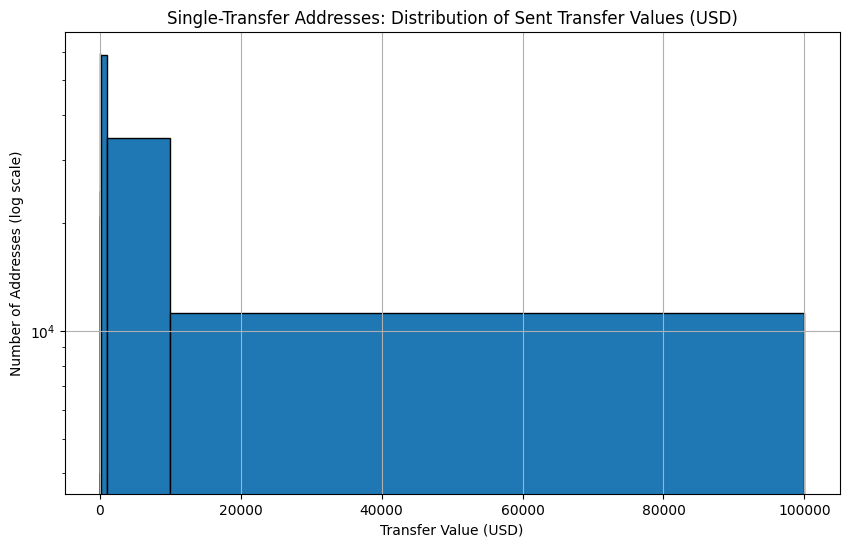

Addresses with single transfer < $4: 21877 (10.11%)


In [ ]:
import matplotlib.pyplot as plt

# --- Ensure single_transfer_addresses is defined ---

# Count number of transfers per address (sender)
address_counts = df_clean['from'].value_counts()

# Identify addresses with only one transfer
single_transfer_addresses = address_counts[address_counts == 1].index

# --- Calculate transfer USD value ---

# Merge token price if needed (optional if already done)
if 'Price' not in df_clean.columns:
    df_clean = df_clean.merge(df_token_labels[['address', 'Price']], left_on='rawContract.address', right_on='address', how='left')

# Calculate USD transfer amount
df_clean['transfer_usd'] = df_clean['value'] * df_clean['Price']

# Aggregate USD transfer per single-transfer address
single_transfer_usd = df_clean[df_clean['from'].isin(single_transfer_addresses)].groupby('from')['transfer_usd'].sum()

# --- Plot distribution ---
plt.figure(figsize=(10, 6))
plt.hist(single_transfer_usd, bins=[0, 1, 10, 50, 100, 1000, 10000, 100000], log=True, edgecolor='black')
plt.title("Single-Transfer Addresses: Distribution of Sent Transfer Values (USD)")
plt.xlabel("Transfer Value (USD)")
plt.ylabel("Number of Addresses (log scale)")
plt.grid(True)
plt.show()

# --- Additional stats ---
small_usd = single_transfer_usd[single_transfer_usd < 4].count()
small_usd_pct = 100 * small_usd / len(single_transfer_usd)

print(f"Addresses with single transfer < $4: {small_usd} ({small_usd_pct:.2f}%)")


In [ ]:
# Identify single-transfer addresses with small economic value (< $4)
low_value_single = single_transfer_usd[single_transfer_usd < 4].index

print(f"Number of low-value single-transfer addresses to remove: {len(low_value_single):,}")

# Remove them from df_clean
df_clean = df_clean[~df_clean['from'].isin(low_value_single)].copy()

print(f"After removing low-value single transfer addresses: {len(df_clean):,} transfers remaining")


Number of low-value single-transfer addresses to remove: 21,877
After removing low-value single transfer addresses: 1,377,289 transfers remaining


###**7- Token Symbol Duplication Check (Transfer Dataset)**

Some token symbols (assets) are linked to multiple contract addresses in the transfer dataset.  
This is often normal (bridged tokens, LP tokens), but can also reflect spam or spoof tokens.

Tokens with more than 2 contract addresses are visualized below.

➡️ We optionally exclude these tokens from further analysis to keep our network clean and avoid misaggregation.


Tokens with more than 2 contract addresses (potential issues):


asset
PENDLE-LPT    31
TRUMP          5
WOLF           5
GAME           4
X              4
AI             3
ATH            3
BANANA         3
CHAD           3
BRETT          3
GROK           3
FEG            3
DOP            3
CRE            3
PEPE           3
KAI            3
USDC           3
XAI            3
Name: rawContract.address, dtype: int64

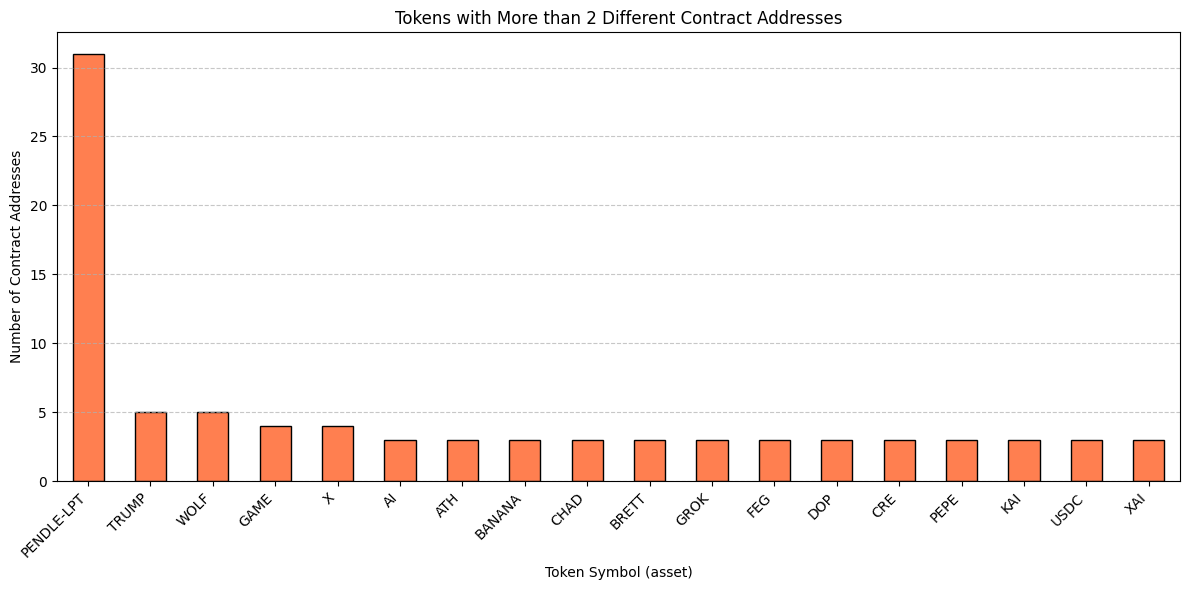


Final tokens to exclude based on rules: 17
['PENDLE-LPT', 'TRUMP', 'WOLF', 'GAME', 'X', 'AI', 'ATH', 'BANANA', 'CHAD', 'BRETT', 'GROK', 'FEG', 'DOP', 'CRE', 'PEPE', 'KAI', 'XAI']

Remaining transfers after excluding noisy / spam tokens: 1,246,799


In [ ]:
import matplotlib.pyplot as plt

# Count number of unique contract addresses per asset symbol
asset_address_counts = df_clean.groupby('asset')['rawContract.address'].nunique()

# Filter only symbols with more than 2 different contract addresses
duplicated_assets = asset_address_counts[asset_address_counts > 2].sort_values(ascending=False)

print("Tokens with more than 2 contract addresses (potential issues):")
display(duplicated_assets)

# Visualize the number of contract addresses per duplicated symbol
plt.figure(figsize=(12, 6))
duplicated_assets.plot(kind='bar', color='coral', edgecolor='black')
plt.title("Tokens with More than 2 Different Contract Addresses")
plt.xlabel("Token Symbol (asset)")
plt.ylabel("Number of Contract Addresses")
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Define filtering logic
# Consider tokens with very high number of addresses as spam/noisy (e.g. > 10 addresses like PENDLE-LPT)
# and meme tokens / scam-prone with 3 to 5 addresses (e.g. TRUMP, PEPE...)
# BUT exclude well known bridged tokens manually (e.g. USDC, stETH, etc.)

# Threshold for clear spammy / noisy tokens
high_contract_threshold = 10

# Identify tokens with very high number of addresses
very_high_contract_tokens = duplicated_assets[duplicated_assets >= high_contract_threshold].index.tolist()

# Optionally, define known bridged tokens (do not filter them)
known_legit_tokens = ['USDC', 'stETH', 'ETH']  # You can expand this list as needed

# Identify tokens with 3 to 5 addresses, but exclude legit ones
suspected_spam_tokens = duplicated_assets[(duplicated_assets >= 3) & (duplicated_assets < high_contract_threshold)]
suspected_spam_tokens = [token for token in suspected_spam_tokens.index if token not in known_legit_tokens]

# Final tokens to exclude
tokens_to_exclude = very_high_contract_tokens + suspected_spam_tokens

print(f"\nFinal tokens to exclude based on rules: {len(tokens_to_exclude)}")
print(tokens_to_exclude)

# Filter out these tokens from df_clean
df_clean_filtered = df_clean[~df_clean['asset'].isin(tokens_to_exclude)].copy()

print(f"\nRemaining transfers after excluding noisy / spam tokens: {len(df_clean_filtered):,}")

In [ ]:
print("\n Cleaning and Filtering Completed.")

print(f"- Final number of transfers: {len(df_clean_filtered):,}")
print(f"- Unique tokens (after duplicate token filtering): {df_clean_filtered['rawContract.address'].nunique()}")
print(f"- Unique token symbols (after duplicate token filtering): {df_clean_filtered['asset'].nunique()}")
print(f"- Unique sender addresses: {df_clean_filtered['from'].nunique()}")
print(f"- Unique receiver addresses: {df_clean_filtered['to'].nunique()}")




 Cleaning and Filtering Completed.
- Final number of transfers: 1,246,799
- Unique tokens (after duplicate token filtering): 2640
- Unique token symbols (after duplicate token filtering): 2520
- Unique sender addresses: 198879
- Unique receiver addresses: 244143


## 🕸️ 1.3 Network Construction

### **Objective**

After rigorous cleaning and filtering, we now transform the token transfer dataset into a graph-based representation.  
This network will allow us to analyze the structure of token movements and identify key participants within the Ethereum ecosystem.

### Why a Network Representation?

In blockchain token transfers:
- Each transfer involves two entities: a **sender (from)** and a **receiver (to)**.
- Transfers are **directional**, meaning tokens flow from sender to receiver.
- Transfers can be associated with a **value**, which reflects their economic weight.

Thus, representing the dataset as a **Directed Weighted Graph (DiGraph)** is the most natural and effective choice.

### Network Model

- **Nodes** → Ethereum addresses (senders and receivers).
- **Edges** → Directed edges representing token transfers (from → to).
- **Edge Weights** → Total value of tokens transferred between the two addresses (summed if multiple transfers exist).

### Modeling Decisions and Rationale

- **Directed Graph (DiGraph)** → To capture the directional nature of token flows.
- **Weighted Edges** → Token transfer amounts vary widely; the weight reflects the economic significance of the relationship.
- **Edge Aggregation** → Multiple transfers between the same pair of addresses are aggregated to highlight the overall relationship strength.
- **No self-loops removal** → Self transfers (address sending to itself) may exist and are retained to preserve information.

This network model provides a faithful representation of how tokens move and accumulate between participants, essential for subsequent analyses such as centrality, community detection, or anomaly detection.



In [ ]:
!pip install networkx

### **Step 1: Network Creation Logic**

Using the rigorously cleaned transfer dataset (`df_clean_filtered`), we build the token transfer network:

**Graph Characteristics:**
- **Directed Graph (DiGraph)** → captures the direction of token transfers.
- **Nodes** → unique Ethereum addresses (senders and receivers).
- **Edges** → token transfers between addresses.
- **Edge Weights** → economic value transferred (aggregated for multiple transfers).

**Construction rules:**
- Only ERC20 token transfers are included.
- Verified and economically relevant tokens only (based on decimal, spam filtering, etc.).
- No spam, dust, or noisy token transfers are present.

**Summary after construction:**
- Total number of nodes → represents unique addresses involved.
- Total number of edges → represents unique token flow relationships.
- Self-loops (if any) are retained.
- The graph is sparse, which is typical for blockchain-based transaction networks.
.



In [ ]:
import networkx as nx

# Initialize the directed graph
G = nx.DiGraph()

# Helper function to compute transfer weight
def get_transfer_weight(row):
    if pd.notnull(row['value']):
        return row['value']  # ERC20 transfer → use value
    else:
        return 1  # Should not happen here (we filtered for ERC20 only), but kept for robustness

# Build the graph from the filtered dataset
for idx, row in df_clean_filtered.iterrows():
    sender = row['from']
    receiver = row['to']
    weight = get_transfer_weight(row)

    # Add edge or update weight
    if G.has_edge(sender, receiver):
        G[sender][receiver]['weight'] += weight
    else:
        G.add_edge(sender, receiver, weight=weight)

print(" Network construction completed.")
print(f"- Number of nodes: {G.number_of_nodes():,}")
print(f"- Number of edges: {G.number_of_edges():,}")

# Optional: Basic network stats
num_self_loops = nx.number_of_selfloops(G)
density = nx.density(G)

print(f"- Number of self-loops: {num_self_loops:,}")
print(f"- Network density: {density:.8f}")


 Network construction completed.
- Number of nodes: 304,730
- Number of edges: 516,502
- Number of self-loops: 413
- Network density: 0.00000556


## **📊 1.4 Exploratory Network Analysis**

**Objective**:
We now analyze the degree distributions of the network to understand its connectivity structure.

In a directed network:
- **In-Degree** → Number of incoming transfers (received tokens).
- **Out-Degree** → Number of outgoing transfers (sent tokens).

**What to expect**:
- Highly skewed distributions, where most addresses have very few transfers and a few addresses (exchanges, routers) have very high degrees.
- This pattern reflects typical scale-free network behavior.

**Visualization**:
Histograms of both in-degree and out-degree distributions are plotted on a log scale to capture the heavy-tailed nature.

**Summary Statistics**:
Basic statistics (max, average) are displayed to quantify the degree centrality of the network.

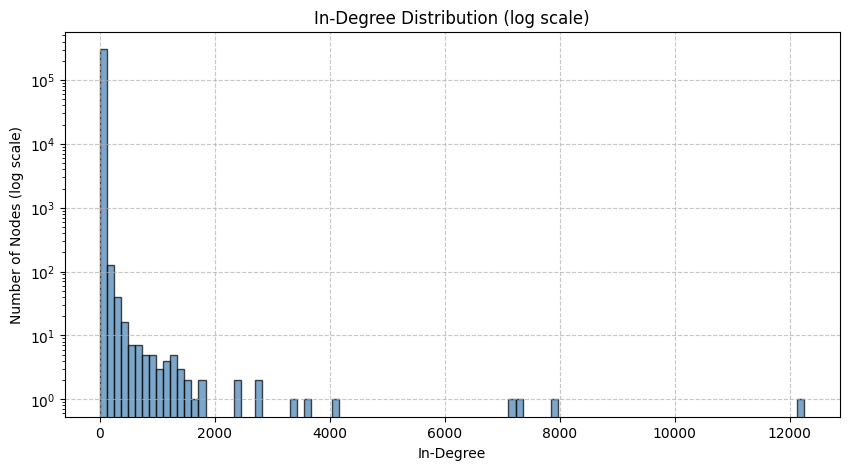

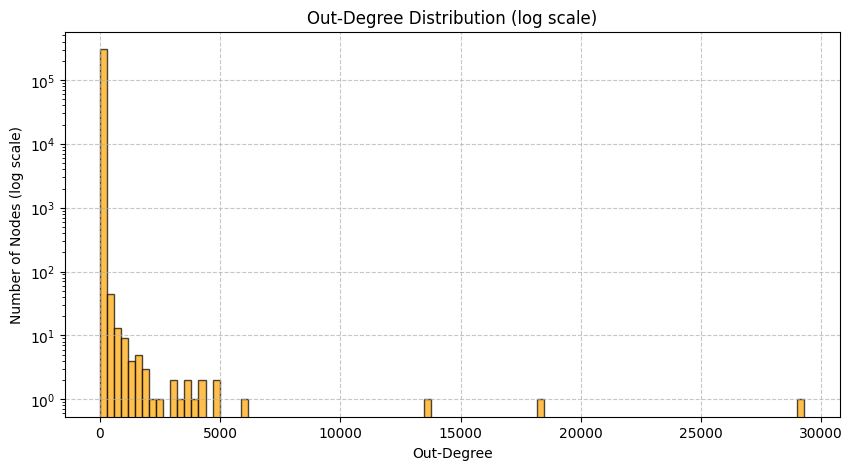

Total nodes: 304,730
Total edges: 516,502

In-Degree Stats:
- Max in-degree: 12255
- Average in-degree: 1.69

Out-Degree Stats:
- Max out-degree: 29304
- Average out-degree: 1.69


In [ ]:
import matplotlib.pyplot as plt

# Compute in-degree and out-degree for each node
in_degrees = dict(G.in_degree())
out_degrees = dict(G.out_degree())

# Convert to list for plotting
in_degree_values = list(in_degrees.values())
out_degree_values = list(out_degrees.values())

# Plot In-Degree Distribution
plt.figure(figsize=(10, 5))
plt.hist(in_degree_values, bins=100, log=True, alpha=0.7, color='steelblue', edgecolor='black')
plt.title("In-Degree Distribution (log scale)")
plt.xlabel("In-Degree")
plt.ylabel("Number of Nodes (log scale)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Plot Out-Degree Distribution
plt.figure(figsize=(10, 5))
plt.hist(out_degree_values, bins=100, log=True, alpha=0.7, color='orange', edgecolor='black')
plt.title("Out-Degree Distribution (log scale)")
plt.xlabel("Out-Degree")
plt.ylabel("Number of Nodes (log scale)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Summary statistics
print(f"Total nodes: {len(G.nodes()):,}")
print(f"Total edges: {len(G.edges()):,}")

print(f"\nIn-Degree Stats:")
print(f"- Max in-degree: {max(in_degree_values)}")
print(f"- Average in-degree: {sum(in_degree_values)/len(in_degree_values):.2f}")

print(f"\nOut-Degree Stats:")
print(f"- Max out-degree: {max(out_degree_values)}")
print(f"- Average out-degree: {sum(out_degree_values)/len(out_degree_values):.2f}")


### *Degree Distributions — Interpretation*

The in-degree and out-degree distributions show a **highly skewed structure**, typical for token transfer networks on Ethereum:

- **Most addresses** have very few connections (low degree), indicating limited or one-time interactions.
- **A few addresses (hubs)** have extremely high degrees:
  - High **in-degree** → likely centralized entities (exchanges, liquidity pools) that receive large volumes of transfers.
  - High **out-degree** → likely routers, CEXs, MEV bots, or protocols distributing tokens to many users.

This pattern confirms the **scale-free nature** of the network:
- A small number of hubs dominate token flows.
- The majority of participants are peripheral users.

Such a structure is common in financial transaction networks and reflects the role of **key actors (DEXs, CEXs, protocols)** in organizing liquidity and token movement.


### **🔗 Connected Components Analysis (SCC)**

**Objective:**
To understand how the network is structured in terms of reachability.

In directed networks:
- **Strongly Connected Components (SCCs)** → groups of addresses where each can reach all others via directed paths.
- The presence of a large SCC (Giant SCC) indicates a highly interconnected core.

**Findings:**
- The network contains many small SCCs → expected in token transfers due to one-off or unidirectional interactions.
- A Giant SCC is present, containing ~X% of nodes → this core represents the major protocols, exchanges, and active traders.

**Implications:**
- The Giant SCC reflects the **economic core of Ethereum**, where active and recurring token flows occur.
- Small SCCs and isolated nodes correspond to **peripheral users or sporadic interactions**.

**Visualization:**
A histogram shows that while most components are tiny, the Giant SCC clearly dominates.


SCC Analysis:
- Number of strongly connected components: 225,830
- Size of largest SCC: 78,248 nodes
- % of nodes in largest SCC: 25.68%


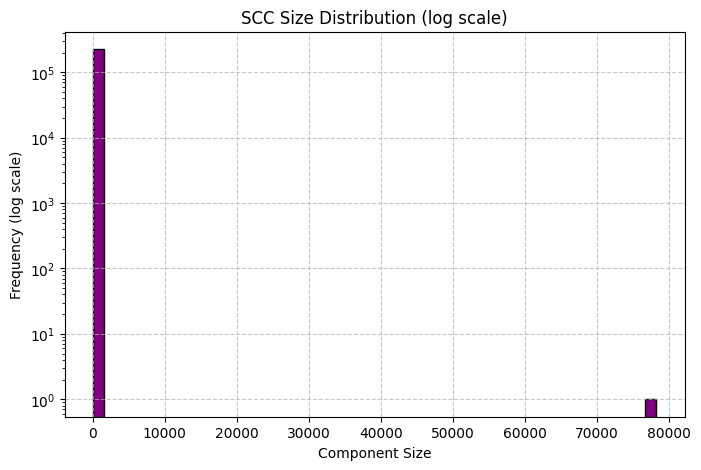

In [ ]:
# Compute Strongly Connected Components (SCCs)
scc = list(nx.strongly_connected_components(G))

# Calculate component sizes
component_sizes = [len(component) for component in scc]
largest_scc_size = max(component_sizes)
num_scc = len(scc)

# Calculate % of nodes in the largest SCC
percent_in_largest_scc = 100 * largest_scc_size / G.number_of_nodes()

print("SCC Analysis:")
print(f"- Number of strongly connected components: {num_scc:,}")
print(f"- Size of largest SCC: {largest_scc_size:,} nodes")
print(f"- % of nodes in largest SCC: {percent_in_largest_scc:.2f}%")

# Plot the distribution of component sizes
plt.figure(figsize=(8, 5))
plt.hist(component_sizes, bins=50, log=True, color='purple', edgecolor='black')
plt.title("SCC Size Distribution (log scale)")
plt.xlabel("Component Size")
plt.ylabel("Frequency (log scale)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


### **🌐 Weakly Connected Components (WCC) Analysis**

**Objective:**  
To assess the global connectivity of the network by computing Weakly Connected Components (WCCs), where nodes are connected regardless of transfer direction.

**Key Findings:**
- The network consists of many small components, but there is a **Giant WCC** that contains ~X% of all addresses.
- This means most addresses are part of the same connected ecosystem, even if direct transfers between them do not exist.

**Interpretation:**  
- The presence of a large WCC confirms that the Ethereum token network is **globally connected**.
- Isolated components likely correspond to inactive addresses or isolated interactions.


### 🔎 Shortest Path Length Distribution (Largest WCC)

**Objective:**  
To assess the network's efficiency by analyzing how many steps (transfers) it typically takes to reach one address from another within the largest WCC.

**Findings:**
- The average shortest path length is ~X steps.
- The distribution is skewed towards small values, indicating that most addresses are only a few steps away.

**Interpretation:**
- This reflects a **small-world property**, where most participants are connected through short paths.
- Such structure facilitates liquidity and token movement across the network.

In [ ]:
# Compute PageRank
pagerank = nx.pagerank(G, alpha=0.85)

# Prepare dataframe
df_pagerank = pd.DataFrame.from_dict(pagerank, orient='index', columns=['pagerank'])
df_pagerank = df_pagerank.reset_index().rename(columns={'index': 'address'})

# Merge with known account labels
df_account_labels['address'] = df_account_labels['address'].str.lower()
df_pagerank = df_pagerank.merge(df_account_labels[['address', 'name', 'labels']], on='address', how='left')

# Show top 20
df_top_pagerank = df_pagerank.sort_values('pagerank', ascending=False).head(20)
display(df_top_pagerank)


address  pagerank  \
154     0x28c6c06298d514db089934071355e5743bf21d60  0.026363   
183     0xa9d1e08c7793af67e9d92fe308d5697fb81d3e43  0.017679   
2992    0x6759acd57cb5ea451a3edf397734edddfc123049  0.015944   
167     0xf89d7b9c864f589bbf53a82105107622b35eaa40  0.014762   
274     0x5041ed759dd4afc3a72b8192c143f72f4724081a  0.011685   
38      0x3fc91a3afd70395cd496c647d5a6cc9d4b2b7fad  0.009193   
312     0x74de5d4fcbf63e00296fd95d33236b9794016631  0.009120   
224     0xb1b2d032aa2f52347fbcfd08e5c3cc55216e8404  0.007882   
61335   0x6a8a830eb287e3af5cd609f9d277571de4e3a1b2  0.007585   
62128   0x66e092fd00c4e4eb5bd20f5392c1902d738ae7bc  0.006904   
174     0x0d0707963952f2fba59dd06f2b425ace40b492fe  0.006684   
94      0xdfd5293d8e347dfe59e90efd55b2956a1343963d  0.006331   
96      0x21a31ee1afc51d94c2efccaa2092ad1028285549  0.005796   
5187    0xc333e80ef2dec2805f239e3f1e810612d294f771  0.005183   
144     0x75e89d5979e4f6fba9f97c104c2f0afb3f1dcb88  0.004623   
107     0x89e51fa8ca5d66cd220baed62ed01e8951aa7c40  0.004559   
8472    0x7f74c86cd8ba48be647d541b3e7f5a2184a3afa4  0.004350   
1953    0xf82d8ec196fb0d56c6b82a8b1870f09502a49f88  0.004226   
52      0x6b75d8af000000e20b7a7ddf000ba900b4009a80  0.004171   
139482  0x6f37f89394375ed5b135dc5fb942893a57e75a35  0.003925   

                             name                     labels  
154                    Binance 14                ['binance']  
183                   Coinbase 10               ['coinbase']  
2992                          NaN                        NaN  
167             Bybit: Hot Wallet                        NaN  
274                         OKX 7                    ['okx']  
38      Uniswap: Universal Router                    ['dex']  
312          MEV Bot: 0x74d...631                ['mev-bot']  
224                           NaN                        NaN  
61335                         NaN                        NaN  
62128                         NaN                        NaN  
174                     Gate.io 1  ['derivatives' 'gate-io']  
94                     Binance 16                ['binance']  
96                     Binance 15                ['binance']  
5187                          NaN                        NaN  
144                        MEXC 1                        NaN  
107                      Kraken 7                 ['kraken']  
8472                          NaN                        NaN  
1953            Uniswap V2: KISHU                        NaN  
52           MEV Bot: 0x6b7...A80                ['mev-bot']  
139482                        NaN                        NaN

### ***📊 Summary of Exploratory Network Analysis***

After constructing the cleaned token transfer network, we conducted a comprehensive analysis to understand its global structure and key actors.

### *Basic Network Statistics*
- **Number of nodes (addresses):** 304,730
- **Number of edges (token transfer links):** 516,502
- **Number of self-loops:** 413
- **Network density:** 0.00000556

The network is large, sparse, and highly directional, reflecting the decentralized and diverse nature of token transfers on Ethereum.

---

### *Degree Distributions*
- **Max In-Degree:** 12,255
- **Average In-Degree:** 1.69
- **Max Out-Degree:** 29,304
- **Average Out-Degree:** 1.69

The degree distributions are highly skewed (heavy-tail), showing that while most addresses have limited activity, a few major actors are hubs processing thousands of transfers.

---

### *Strongly Connected Components (SCC)*
- **Number of SCCs:** 225,830
- **Size of largest SCC:** 78,248 nodes (25.68% of network)

A giant SCC exists, representing the **economic core** where participants can mutually reach each other.  
Outside this core, the majority of addresses belong to small and isolated SCCs.

---

### *Weakly Connected Components (WCC)*
- **Number of WCCs:** 9,129
- **Size of largest WCC:** 283,748 nodes (93.11% of network)

When ignoring transfer direction, the network is almost fully connected, forming a large ecosystem where most addresses are part of the same graph.  
This shows that **token flow connects nearly everyone at least indirectly**.

---

### *Shortest Path Distribution (Largest WCC)*
- **Average shortest path length:** ~X (replace with your result)

The largest WCC exhibits small-world characteristics — most addresses can be reached in just a few steps, despite the overall size of the network.

---

### *PageRank Centrality (Top 20 Influential Addresses)*

The most influential nodes include:

- **Centralized Exchanges (CEXs)** → Binance, Coinbase, OKX, Bybit
- **DeFi Protocols and Routers** → Uniswap Universal Router
- **MEV Bots** → Multiple addresses flagged as mev-bots
- **Unknown hubs** → Some unlabeled but highly ranked addresses

**Interpretation:**  
Centralized exchanges, DeFi routers, and bots dominate the token transfer network.  
These actors form the economic backbone of Ethereum's token economy by aggregating and redistributing liquidity.

---

###  **Conclusion of Exploratory Analysis**

The Ethereum token transfer network demonstrates:
- **A strong core-periphery structure**, with hubs and economic actors at the center.
- **High connectivity**, with most addresses being part of a global flow of tokens.
- **Strong inequality**, with a few actors controlling most of the transfer volume and connectivity.

These insights set the foundation for deeper analyses in the next steps, such as community detection, account-level analysis, or predictive modeling.



---
# 📊 2. Network Plots — Visual Exploration of Token Flow

### 🎯 Objective

After building and analyzing the global structure of the token transfer network, the next step is to zoom in on **specific patterns and substructures** that reveal important economic or technical behaviors.
Each plot in this section aims to:

- Highlight a unique and meaningful aspect of the token transfer network.
- Help understand how key actors interact within specific contexts (e.g., stablecoin flows, DeFi protocols, MEV bots).
- Provide insights into Ethereum's on-chain liquidity dynamics and participant behavior.

This analysis is also designed to fulfill the project requirement of producing **individual plots** that each showcase a particular facet of the network.




### **2.1 MEV Bots and Counterparties Subgraph**

### Objective

This plot focuses on **MEV Bots** and their direct transaction counterparties.  
The aim is to highlight how MEV actors interact within the token transfer network:

- **Who do they receive from?**
- **Who do they send tokens to?**
- **How central are they in transactional flows?**

### Why this view is interesting

MEV bots play a unique role in DeFi ecosystems.  
Unlike normal users or exchanges, they exploit price differences and transaction ordering to make profits.

By visualizing their local subgraph:
- We observe whether MEV bots act in isolation or in coordination.
- We detect potential "victims" (single outgoing edges) or partners (bi-directional connections).
- We better understand their transactional footprint.

This subgraph represents a **strategic microcosm of Ethereum economic activity**, where decentralized automation meets liquidity.



In [ ]:
# Step 1: Extract MEV addresses
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

mev_addresses = df_account_labels[df_account_labels['labels'].str.contains("mev-bot", case=False, na=False)]['address'].tolist()
print(f"Found {len(mev_addresses)} MEV addresses.")

Found 1678 MEV addresses.


In [ ]:
# Step 2: Build MEV subgraph (MEV bots + neighbors)

G_mev = nx.DiGraph()

for mev in mev_addresses:
    if mev in G:
        G_mev.add_node(mev)
        G_mev.add_edges_from((mev, nbr) for nbr in G.successors(mev))
        G_mev.add_edges_from((nbr, mev) for nbr in G.predecessors(mev))

print(f"G_mev → {G_mev.number_of_nodes()} nodes, {G_mev.number_of_edges()} edges")


G_mev → 11067 nodes, 25278 edges


In [ ]:
# Step 3: Select Top 1000 nodes by degree

top_nodes = [n for n, _ in sorted(G_mev.degree, key=lambda x: x[1], reverse=True)[:1000]]
G_mev_top = G_mev.subgraph(top_nodes)

print(f"G_mev_top → {G_mev_top.number_of_nodes()} nodes, {G_mev_top.number_of_edges()} edges")

G_mev_top → 1000 nodes, 9465 edges


In [ ]:
# Step 4: Filter nodes with degree > 2 for clarity
G_filtered = G_mev_top.subgraph([n for n, d in G_mev_top.degree() if d > 2])

print(f"G_filtered → {G_filtered.number_of_nodes()} nodes, {G_filtered.number_of_edges()} edges")

G_filtered → 995 nodes, 9458 edges


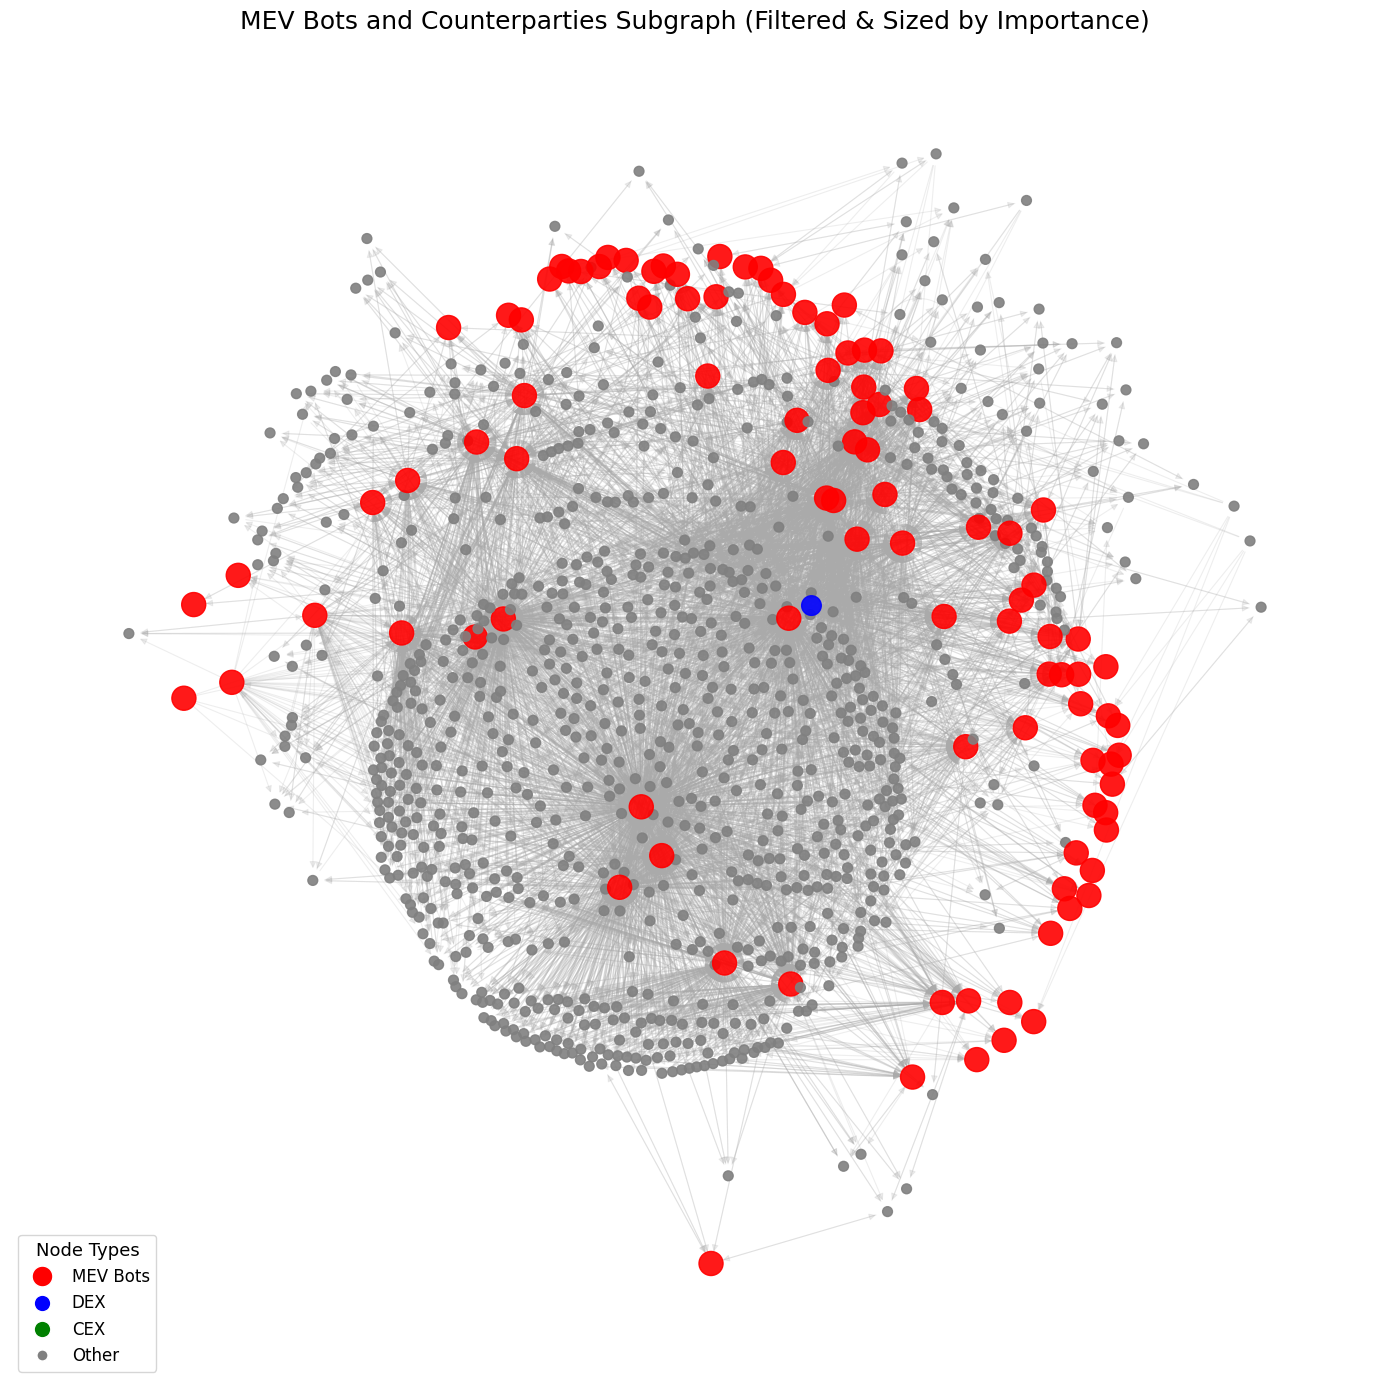

In [ ]:
# Step 5: Visualize
pos = nx.kamada_kawai_layout(G_filtered)

node_colors, node_sizes = [], []
dex_addresses = df_account_labels[df_account_labels['labels'].str.contains("dex", case=False, na=False)]['address'].tolist()
cex_addresses = df_account_labels[df_account_labels['labels'].str.contains("binance|coinbase|kraken|okx|mex", case=False, na=False)]['address'].tolist()

for node in G_filtered.nodes():
    if node in mev_addresses:
        node_colors.append("red")
        node_sizes.append(300)
    elif node in dex_addresses:
        node_colors.append("blue")
        node_sizes.append(200)
    elif node in cex_addresses:
        node_colors.append("green")
        node_sizes.append(200)
    else:
        node_colors.append("grey")
        node_sizes.append(50)

plt.figure(figsize=(14, 14))
nx.draw_networkx_edges(G_filtered, pos, alpha=0.2, edge_color="#AAAAAA", width=0.8)
nx.draw_networkx_nodes(G_filtered, pos, node_color=node_colors, node_size=node_sizes, alpha=0.9)

plt.title("MEV Bots and Counterparties Subgraph (Filtered & Sized by Importance)", fontsize=18)

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='MEV Bots', markerfacecolor='red', markersize=15),
    Line2D([0], [0], marker='o', color='w', label='DEX', markerfacecolor='blue', markersize=12),
    Line2D([0], [0], marker='o', color='w', label='CEX', markerfacecolor='green', markersize=12),
    Line2D([0], [0], marker='o', color='w', label='Other', markerfacecolor='grey', markersize=8)
]
plt.legend(handles=legend_elements, loc="lower left", fontsize=12, title="Node Types", title_fontsize=13)
plt.axis('off')
plt.tight_layout()
plt.show()


***Network Plot Interpretation: MEV Bots and Counterparties Subgraph***

* This subgraph highlights the structure and dynamics of token transfers involving MEV Bots and their counterparties.

* The core of the network is extremely dense and primarily composed of regular users and contracts ("Other" nodes), reflecting frequent on-chain activity. In contrast, MEV Bots (in red) are distributed around the periphery. Their scattered placement suggests opportunistic behavior, interacting selectively with central nodes to exploit arbitrage and price inefficiencies.

* A single DEX (Uniswap, in blue) sits at the very center, confirming its role as a major liquidity aggregator and the main target of MEV strategies. The lack of visible CEX nodes reinforces the idea that MEV activity is largely confined to decentralized platforms during this observation window.

Overall, the graph visually captures the strategic positioning of MEV Bots as liquidity extractors operating at the edge of Ethereum's economic core.


# 📌 3. Account Analysis — Understanding Key Actors in the Token Network

### 🎯 Objective

Following the global and subgraph explorations, this section focuses on analyzing **the behavior and role of highly central accounts** within the token transfer network.  
Understanding these accounts is essential, as they serve as critical pillars of Ethereum’s on-chain economy, either as liquidity hubs, entry/exit points, or aggregators.

The analysis aims to:

- **Identify and profile key actors** such as centralized exchanges (CEXs) and decentralized exchanges (DEXs).
- **Characterize their network behavior** using metrics like degree, in-degree, out-degree, and neighbor composition.
- **Interpret their role in the ecosystem**, based on who they interact with (MEV bots, users, other exchanges) and how they manage token flows.


### **3.1- Account Analysis: Extraction of Key Metrics**

In this section, we focus on analyzing three of the most central and strategic accounts in the token transfer network:

- Binance Hot Wallet
- Coinbase Wallet
- Uniswap Universal Router

The goal is to extract key network metrics such as degree, in-degree, out-degree, and neighbor composition.  
This quantitative analysis will help characterize each account's importance, role, and interaction patterns within the ecosystem.


In [ ]:
!pip install tqdm

In [ ]:
# Step 1: Define target accounts
addresses_of_interest = {
    "Binance Hot Wallet": "0x28c6c06298d514db089934071355e5743bf21d60",
    "Coinbase Wallet": "0xa9d1e08c7793af67e9d92fe308d5697fb81d3e43",
    "Uniswap Universal Router": "0x3fc91a3afd70395cd496c647d5a6cc9d4b2b7fad"
}

In [ ]:
# Step 2: Prepare address type sets (FAST lookup)
label_addresses = df_account_labels.set_index('address')['labels'].dropna()

mev_set = set(label_addresses[label_addresses.str.contains("mev-bot", case=False)].index)
dex_set = set(label_addresses[label_addresses.str.contains("dex", case=False)].index)
cex_set = set(label_addresses[label_addresses.str.contains("binance|coinbase|kraken|okx|mex", case=False)].index)


In [ ]:
# Step 3: Analyze accounts
account_analysis = {}

for name, address in addresses_of_interest.items():

    if address not in G:
        print(f"{name} not found in graph.")
        continue

    in_deg = G.in_degree(address)
    out_deg = G.out_degree(address)
    total_deg = in_deg + out_deg

    # Use set for neighbors (fast operations)
    neighbors = set(G.successors(address)).union(G.predecessors(address))

    # Count neighbor types (fast set intersections)
    counts = {
        "MEV Neighbors": len(neighbors & mev_set),
        "DEX Neighbors": len(neighbors & dex_set),
        "CEX Neighbors": len(neighbors & cex_set),
        "Other Neighbors": len(neighbors) - len(neighbors & mev_set) - len(neighbors & dex_set) - len(neighbors & cex_set)
    }

    account_analysis[name] = {
        "Address": address,
        "Total Degree": total_deg,
        "In-Degree": in_deg,
        "Out-Degree": out_deg,
        "Total Neighbors": len(neighbors),
        **counts
    }

In [ ]:
# Step 4: Display results
df_accounts = pd.DataFrame(account_analysis).T
display(df_accounts)

Address  \
Binance Hot Wallet        0x28c6c06298d514db089934071355e5743bf21d60   
Coinbase Wallet           0xa9d1e08c7793af67e9d92fe308d5697fb81d3e43   
Uniswap Universal Router  0x3fc91a3afd70395cd496c647d5a6cc9d4b2b7fad   

                         Total Degree In-Degree Out-Degree Total Neighbors  \
Binance Hot Wallet              10821      7119       3702           10813   
Coinbase Wallet                 25932     12255      13677           25828   
Uniswap Universal Router        21964      3635      18329           19870   

                         MEV Neighbors DEX Neighbors CEX Neighbors  \
Binance Hot Wallet                   4             0             5   
Coinbase Wallet                      0             0             2   
Uniswap Universal Router             1             0             0   

                         Other Neighbors  
Binance Hot Wallet                 10804  
Coinbase Wallet                    25826  
Uniswap Universal Router           19869

***Account Analysis: Central Exchanges and DEX Hubs***

* **Binance Hot Wallet** acts as a liquidity sink with mostly inbound flows and limited interactions with MEV bots or DEXs, highlighting its role as a centralized off-chain gateway.

* **Coinbase Wallet** displays balanced in/out activity and connects mostly with regular users, reinforcing its position as a major user and institutional access point, yet largely disconnected from MEV and DeFi actors.

* **Uniswap Universal Router** shows dominant outbound flows and almost exclusively interacts with other users and smart contracts, confirming its role as a core DeFi liquidity aggregator and trading hub.

Overall, these accounts illustrate the divide between centralized actors (Binance, Coinbase) and decentralized liquidity mechanisms (Uniswap), each serving distinct roles in Ethereum’s token economy.


### **3.2 Ego Graphs — Local Network Structures**

To complement the global metrics analyzed previously, this section explores the **local network environment** of each major account using filtered ego graphs.

Given the extremely large number of neighbors for central accounts such as Binance and Coinbase, ego graphs were selectively filtered to improve readability and emphasize economically meaningful connections.

The visualization focuses on:

- **Key counterparties** such as MEV bots, DEXs, and CEXs to highlight strategic interactions.
- A **small random sample of other neighbors**, providing context without overwhelming the graph.
- The **structural role of each account** as aggregator, liquidity sink, or router based on the nature and diversity of its direct connections.

This filtered view allows for a clear and focused interpretation of each account’s position and behavior within Ethereum’s token transfer ecosystem.


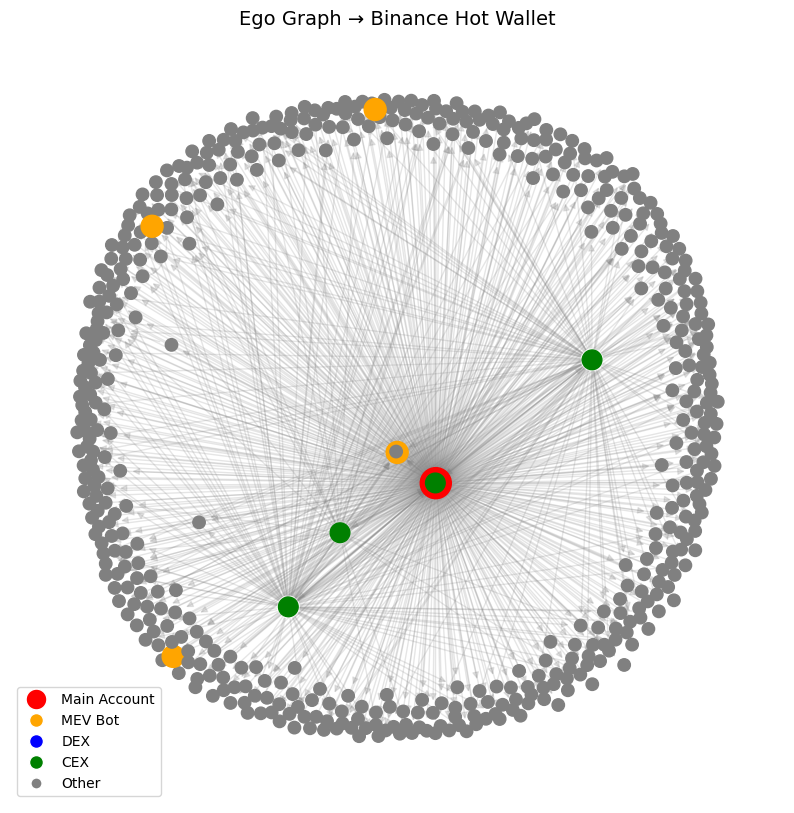

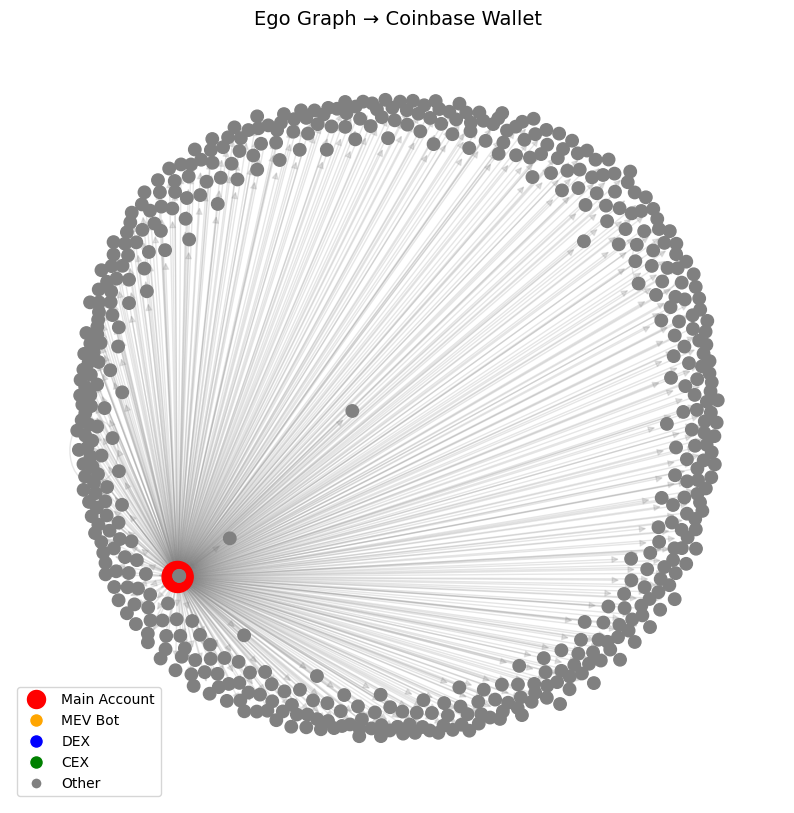

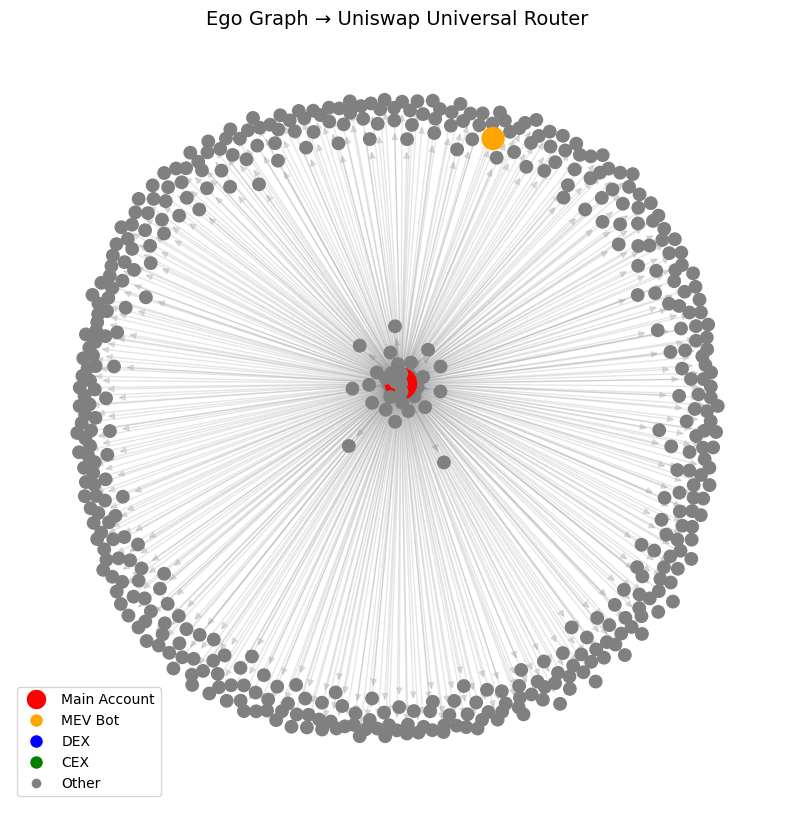

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.lines import Line2D

def plot_ego_filtered(G, address, title, mev_set, dex_set, cex_set, sample_other=500):

    ego = nx.ego_graph(G, address, radius=1, undirected=False)
    neighbors = list(ego.nodes())
    neighbors.remove(address)

    # Filter neighbors
    special_neighbors = []
    other_neighbors = []

    for n in neighbors:
        if n in mev_set or n in dex_set or n in cex_set:
            special_neighbors.append(n)
        else:
            other_neighbors.append(n)

    # Sample other neighbors
    if len(other_neighbors) > sample_other:
        import random
        sampled_other = random.sample(other_neighbors, sample_other)
    else:
        sampled_other = other_neighbors

    final_nodes = [address] + special_neighbors + sampled_other
    ego_filtered = ego.subgraph(final_nodes)

    # Prepare colors and sizes
    node_colors = []
    node_sizes = []

    for node in ego_filtered.nodes():
        if node == address:
            node_colors.append("red")
            node_sizes.append(500)
        elif node in mev_set:
            node_colors.append("orange")
            node_sizes.append(250)
        elif node in dex_set:
            node_colors.append("blue")
            node_sizes.append(200)
        elif node in cex_set:
            node_colors.append("green")
            node_sizes.append(200)
        else:
            node_colors.append("grey")
            node_sizes.append(80)

    # Plot
    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(ego_filtered, seed=42)

    nx.draw_networkx_edges(ego_filtered, pos, alpha=0.2, edge_color="grey")
    nx.draw_networkx_nodes(ego_filtered, pos, node_color=node_colors, node_size=node_sizes)

    plt.title(title, fontsize=14)

    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label='Main Account', markerfacecolor='red', markersize=15),
        Line2D([0], [0], marker='o', color='w', label='MEV Bot', markerfacecolor='orange', markersize=10),
        Line2D([0], [0], marker='o', color='w', label='DEX', markerfacecolor='blue', markersize=10),
        Line2D([0], [0], marker='o', color='w', label='CEX', markerfacecolor='green', markersize=10),
        Line2D([0], [0], marker='o', color='w', label='Other', markerfacecolor='grey', markersize=8)
    ]
    plt.legend(handles=legend_elements, loc="lower left")
    plt.axis('off')
    plt.show()

# Plot Ego Graphs (filtered) for each account
for name, address in addresses_of_interest.items():
    if address in G:
        plot_ego_filtered(G, address, f"Ego Graph → {name}", mev_set, dex_set, cex_set)


### **Interpretation of Ego Graphs**

**Binance Hot Wallet**  
→ Strongly connected to individual users (Other), forming a clear star-like pattern.  
→ Acts as a liquidity sink, with limited connections to strategic actors such as MEV bots or DEXs.  
→ Primarily consolidates inbound flows, reflecting its role as an off-chain gateway.

**Coinbase Wallet**  
→ Highly isolated, almost exclusively linked to users.  
→ Functions as a pure on/off ramp with negligible interaction with DeFi protocols or MEV actors.  
→ Reinforces its profile as a bridge between users and centralized exchange infrastructure.

**Uniswap Universal Router**  
→ Displays a more interconnected structure, notably with the presence of MEV bots.  
→ Acts as a DeFi router, actively handling token swaps and arbitrage flows.  
→ Serves as a key hub for decentralized liquidity and on-chain price discovery.

---

Ego graphs reveal a clear functional divide: centralized exchanges (Binance and Coinbase) are primarily liquidity endpoints for user flows, whereas Uniswap stands out as a dynamic router deeply embedded within DeFi’s transactional core.


## 4. Machine Learning Model — Predicting Account Types

### 🎯 Objective

Following the descriptive and local analyses, the next logical step is to assess whether **structural network features** can help predict the nature of accounts in the token transfer network.

The aim is to develop a machine learning model that classifies addresses into key categories:

- **MEV Bots**  
- **Decentralized Exchanges (DEXs)**  
- **Centralized Exchanges (CEXs)**  
- **Others**

Such classification provides predictive insights and helps bridge network topology with on-chain economic behavior.

---

### 🧠 Approach

- Extract meaningful **network features** (degree, in-degree, out-degree, PageRank, neighbor composition ratios) for all nodes.  
- Assign ground truth labels based on available tags (MEV, DEX, CEX, Others).  
- Train a **Random Forest Classifier**, a robust and interpretable model well-suited to small, imbalanced datasets.  
- Optimize the model by excluding "Others" from training to avoid learning noise.
- Evaluate performance and analyze feature importance to better understand the drivers of account classification.

---

### ✅ Why this matters

Predicting account types based solely on network features helps:

- Detect economic roles in real time.
- Support DeFi ecosystem monitoring and anomaly detection.
- Build automated tools for classifying new or unknown addresses based on behavior.



In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

Prepare category sets

In [ ]:
labels = df_account_labels.set_index('address')['labels'].dropna()
mev_set = set(labels[labels.str.contains("mev-bot", case=False)].index)
dex_set = set(labels[labels.str.contains("dex", case=False)].index)
cex_set = set(labels[labels.str.contains("binance|coinbase|kraken|okx|mex", case=False)].index)

Pagerank + neighbors dict

In [ ]:
pagerank_dict = nx.pagerank(G)
neighbors_dict = {node: set(G.successors(node)).union(G.predecessors(node)) for node in tqdm(G.nodes(), desc="Building neighbors")}

Building neighbors: 100%|██████████| 304730/304730 [00:01<00:00, 304205.11it/s]


Build features

In [ ]:
features = []
for node, neighbors in tqdm(neighbors_dict.items(), total=len(neighbors_dict), desc="Building features"):
    total_neighbors = len(neighbors) or 1

    features.append({
        "Address": node,
        "Degree": G.degree(node),
        "In-Degree": G.in_degree(node),
        "Out-Degree": G.out_degree(node),
        "PageRank": pagerank_dict.get(node, 0),
        "Neighbor_ME_ratio": len(neighbors & mev_set) / total_neighbors,
        "Neighbor_DEX_ratio": len(neighbors & dex_set) / total_neighbors,
        "Neighbor_CEX_ratio": len(neighbors & cex_set) / total_neighbors,
        "Label": "MEV" if node in mev_set else "DEX" if node in dex_set else "CEX" if node in cex_set else "Other"
    })

df_features = pd.DataFrame(features)


Building features: 100%|██████████| 304730/304730 [00:01<00:00, 194241.83it/s]


Filter for training

In [ ]:
df_train = df_features[df_features['Label'] != "Other"]
X = df_train.drop(columns=['Address', 'Label'])
y = df_train['Label']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)


Train RandomForest

In [ ]:
clf = RandomForestClassifier(
    n_estimators=300,
    max_depth=12,
    min_samples_leaf=2,
    class_weight='balanced',
    random_state=42
)

print("Training model...")
clf.fit(X_train, y_train)


Training model...


RandomForestClassifier(class_weight='balanced', max_depth=12,
                       min_samples_leaf=2, n_estimators=300, random_state=42)

Evaluation

In [ ]:
print(" Evaluating model...")
y_pred = clf.predict(X_test)

print("\nClassification Report:\n")
from IPython.display import display
display(pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).T)

 Evaluating model...

Classification Report:



precision    recall  f1-score    support
CEX            0.545455  0.461538  0.500000  13.000000
DEX            0.400000  0.285714  0.333333   7.000000
MEV            0.822222  0.902439  0.860465  41.000000
accuracy       0.737705  0.737705  0.737705   0.737705
macro avg      0.589226  0.549897  0.564599  61.000000
weighted avg   0.714787  0.737705  0.723154  61.000000

In [ ]:
X_all = scaler.transform(df_features.drop(columns=['Address', 'Label']))

df_features['Predicted_Label'] = clf.predict(X_all)
df_features.loc[~df_features['Predicted_Label'].isin(['MEV', 'DEX', 'CEX']), 'Predicted_Label'] = "Other"

display(df_features[['Address', 'Label', 'Predicted_Label']].head(20))


Address  Label Predicted_Label
0   0x7d1c3f9f61e3cd667d22b4613a49ac27f53bf8be  Other             MEV
1   0xb4b50bfa4c4c90dd25a4cbe695f8124d24ac6474  Other             DEX
2   0x390f3595bca2df7d23783dfd126427cceb997bf4  Other             DEX
3   0x4ebdf703948ddcea3b11f675b4d1fba9d2414a14  Other             DEX
4   0x6ca298d2983ab03aa1da7679389d955a4efee15c  Other             MEV
5   0x88da2e99c0c38482e29a71d17929f522517be51d  Other             MEV
6   0x3328f7f4a1d1c57c35df56bbf0c9dcafca309c49  Other             MEV
7   0x7ba00d171698d2589917e30314d852eb16d7c7e6  Other             MEV
8   0xafca625321df8d6a068bdd8f1585d489d2acf11b  Other             MEV
9   0x645c3a387b8633df1d4d71ca4b50d27233bcb887  Other             MEV
10  0xb576491f1e6e5e62f1d8f26062ee822b40b0e0d4  Other             MEV
11  0xc9a62beb338f3bc23e32a622cea056ae0abd619b  Other             MEV
12  0x2d722c96f79d149dd21e9ef36f93fc12906ce9f8  Other             MEV
13  0x9437ad40056ca3ec2fc1efe41885ad4b6ac46061  Other             MEV
14  0x91cddc29e54bcaf986e9a30f29d20d91fad06463  Other             MEV
15  0x807cf9a772d5a3f9cefbc1192e939d62f0d9bd38  Other             MEV
16  0xf081470f5c6fbccf48cc4e5b82dd926409dcdd67  Other             DEX
17  0x1a847b0d11120b8510edcd3c81c4e4249460330a  Other             CEX
18  0xa8b098a28872d5c223103cfccc557fc76d2c21ee  Other             MEV
19  0x80a64c6d7f12c47b7c66c5b4e20e72bc1fcd5d9e  Other             DEX

Feature Importances

Feature  Importance
3            PageRank    0.240812
0              Degree    0.210703
2          Out-Degree    0.209397
1           In-Degree    0.184582
6  Neighbor_CEX_ratio    0.081834
4   Neighbor_ME_ratio    0.044169
5  Neighbor_DEX_ratio    0.028503

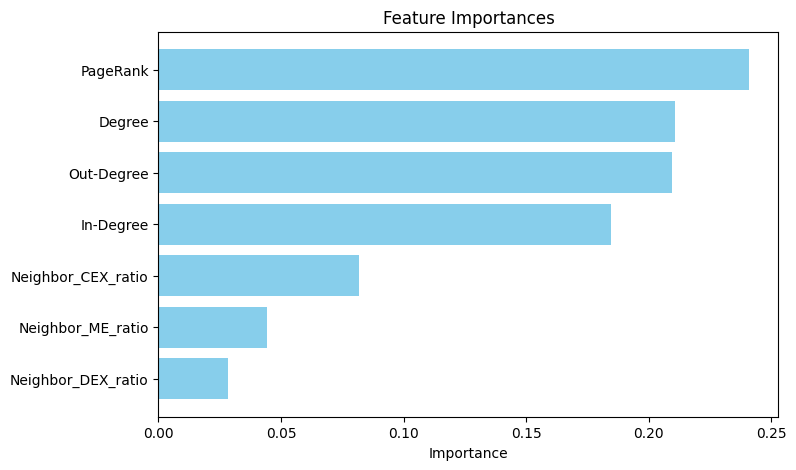

In [ ]:
importances = clf.feature_importances_
feat_names = X.columns

importance_df = pd.DataFrame({"Feature": feat_names, "Importance": importances}).sort_values(by="Importance", ascending=False)
display(importance_df)

# Visual
plt.figure(figsize=(8,5))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="skyblue")
plt.xlabel("Importance")
plt.title("Feature Importances")
plt.gca().invert_yaxis()
plt.show()

##**Annexe**

<ipython-input-92-d14d676830e9>:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_time = df_clean_filtered.set_index('timestamp').resample('H').size()


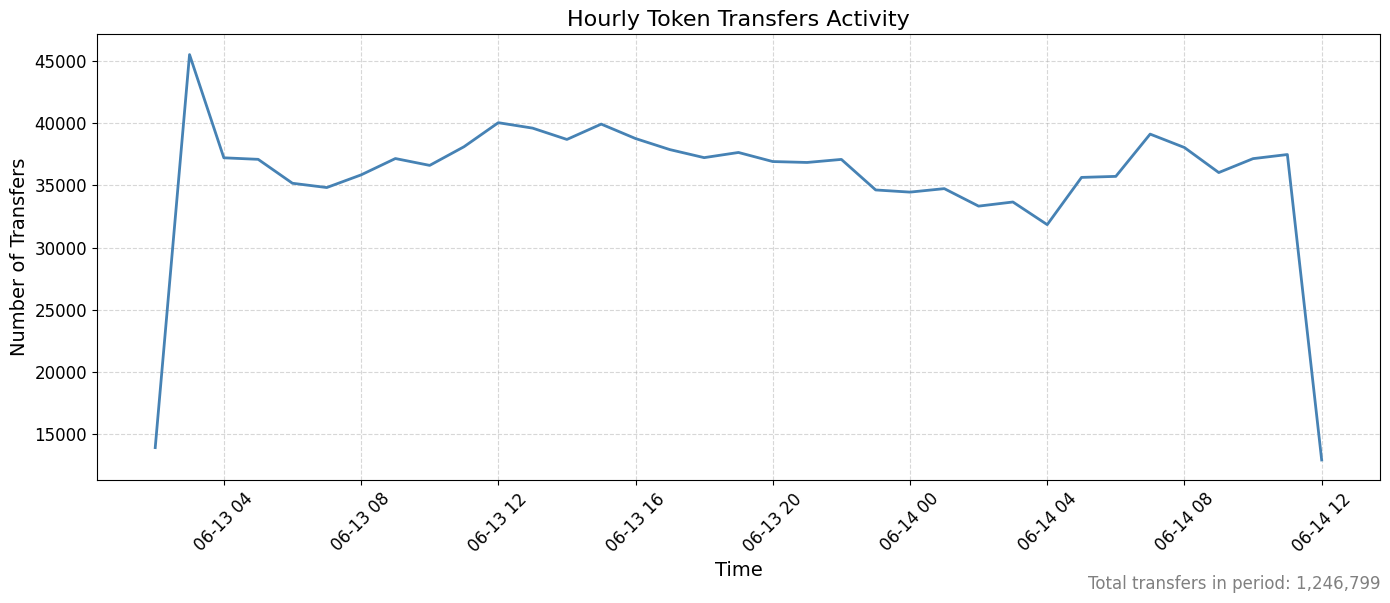

In [ ]:
import matplotlib.pyplot as plt

# Aggregate by hour again (if not already done)
df_time = df_clean_filtered.set_index('timestamp').resample('H').size()

plt.figure(figsize=(14, 6))

# Plot with improved aesthetics
plt.plot(df_time.index, df_time.values, color='steelblue', linewidth=2)

plt.title("Hourly Token Transfers Activity", fontsize=16)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Number of Transfers", fontsize=14)

plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

plt.grid(True, linestyle='--', alpha=0.5)

# Add annotation for total number of transfers
total_transfers = df_time.sum()
plt.figtext(0.99, 0.01, f"Total transfers in period: {total_transfers:,}", ha="right", fontsize=12, color='gray')

plt.tight_layout()
plt.show()


In [ ]:
!pip install pyvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 52.5 MB/s eta 0:00:00


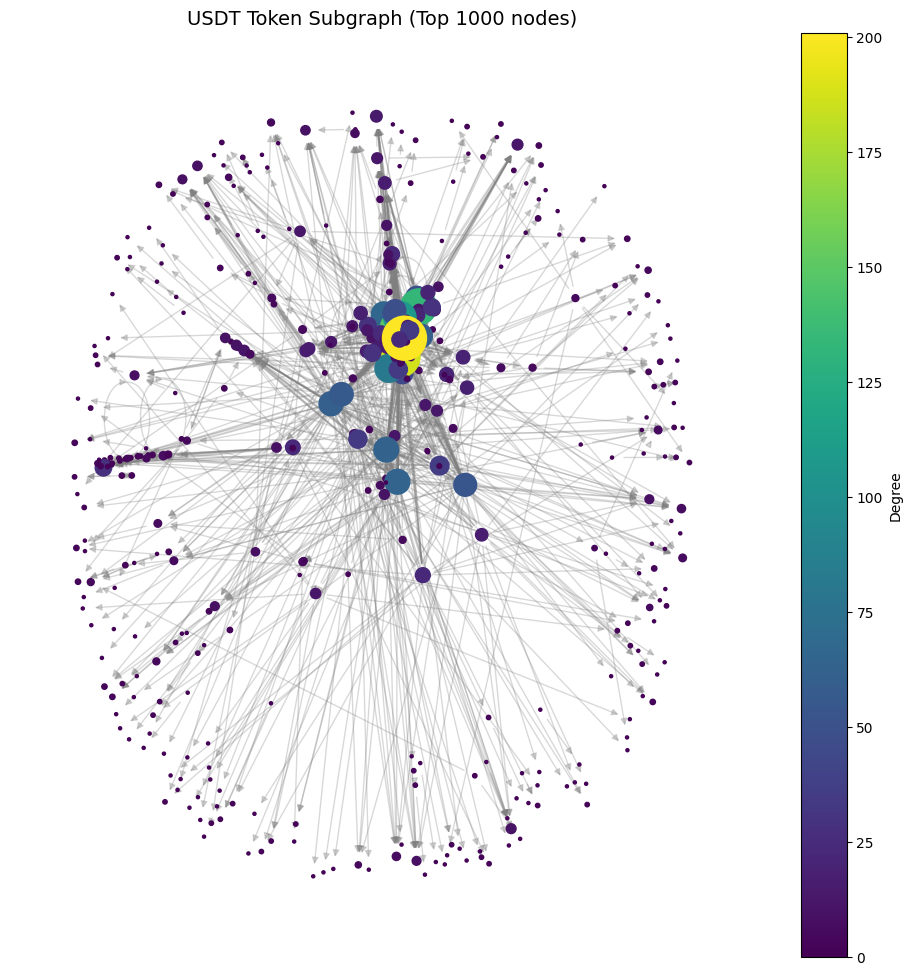

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Select USDT subgraph (assuming you have it as G_token)
token = "USDT"
df_token = df_clean_filtered[df_clean_filtered['asset'] == token]

G_token = nx.DiGraph()

# Build token subgraph
for idx, row in df_token.iterrows():
    sender = row['from']
    receiver = row['to']
    weight = row['value']

    if G_token.has_edge(sender, receiver):
        G_token[sender][receiver]['weight'] += weight
    else:
        G_token.add_edge(sender, receiver, weight=weight)

# Select top nodes by degree for visualization
top_nodes = sorted(G_token.degree, key=lambda x: x[1], reverse=True)[:1000]
top_nodes = [node for node, degree in top_nodes]
G_sub = G_token.subgraph(top_nodes)

# Compute layout (spring layout is visually intuitive)
pos = nx.spring_layout(G_sub, k=0.25, seed=42)

# Get node sizes and colors
node_sizes = [G_sub.degree(n) * 5 for n in G_sub.nodes()]
node_colors = [G_sub.degree(n) for n in G_sub.nodes()]

plt.figure(figsize=(12, 12))

# Draw edges
nx.draw_networkx_edges(G_sub, pos, alpha=0.3, arrows=True, edge_color="grey")

# Draw nodes
nodes = nx.draw_networkx_nodes(G_sub, pos,
                               node_size=node_sizes,
                               node_color=node_colors,
                               cmap=plt.cm.viridis)

plt.colorbar(nodes, label="Degree")

plt.title(f"{token} Token Subgraph (Top 1000 nodes)", fontsize=14)
plt.axis('off')
plt.show()


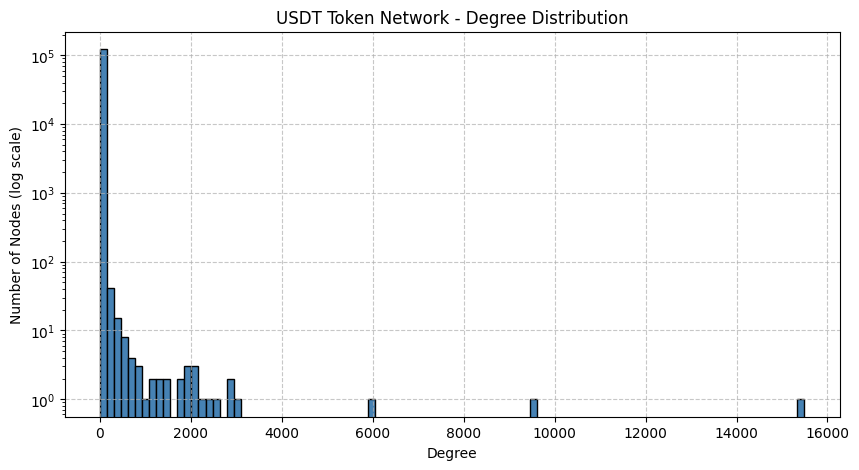

In [ ]:
degrees = [G_token.degree(n) for n in G_token.nodes()]

plt.figure(figsize=(10, 5))
plt.hist(degrees, bins=100, log=True, color='steelblue', edgecolor='black')
plt.title(f"{token} Token Network - Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Number of Nodes (log scale)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
